NAMA : MOHAMMAD RAFI ADITHAMA

NIM  : 2209106041

KELAS: A22

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import splitfolders 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMPORT LIBRARY DULU

In [2]:
base_dir = 'pokemon'

DEKLARASI TEMPAT SIMPAN IMAGE

In [3]:
splitfolders.ratio(base_dir,
                    output="dataset_final",
                   seed=1337,
                   ratio=(.8,.1,.1))

Copying files: 0 files [00:00, ? files/s]

Copying files: 2132 files [00:42, 50.17 files/s]


In [4]:
train_img_path = r'C:\Users\User\Documents\pt kb\pt7 rapi\dataset_final\test'
test_img_path = r'C:\Users\User\Documents\pt kb\pt7 rapi\dataset_final\train'
validation_img_path = r'C:\Users\User\Documents\pt kb\pt7 rapi\dataset_final\val'
class_names = os.listdir(train_img_path)

BAGI DATSET BUAT TRAIN,TEST,VALIDASI

In [5]:
# ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    fill_mode='nearest'
)

In [6]:
# Train Generator
train_generator = train_datagen.flow_from_directory(
    train_img_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary' # jika hanya ada 2 Kelas memakai binary (Matang |Ripe| dan Unripe |Tidak Matang|
)

# Validation Generator
validation_generator = train_datagen.flow_from_directory(
    validation_img_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Test Generator
test_generator = train_datagen.flow_from_directory(
    test_img_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
)

Found 216 images belonging to 2 classes.


Found 212 images belonging to 2 classes.
Found 1696 images belonging to 2 classes.


READ DATASET DAN KITA LAKUKAN SPLIT DATASET

In [7]:
class_names

['digimon', 'pokemon']

MENAMPILKAN KELAS DATASET

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


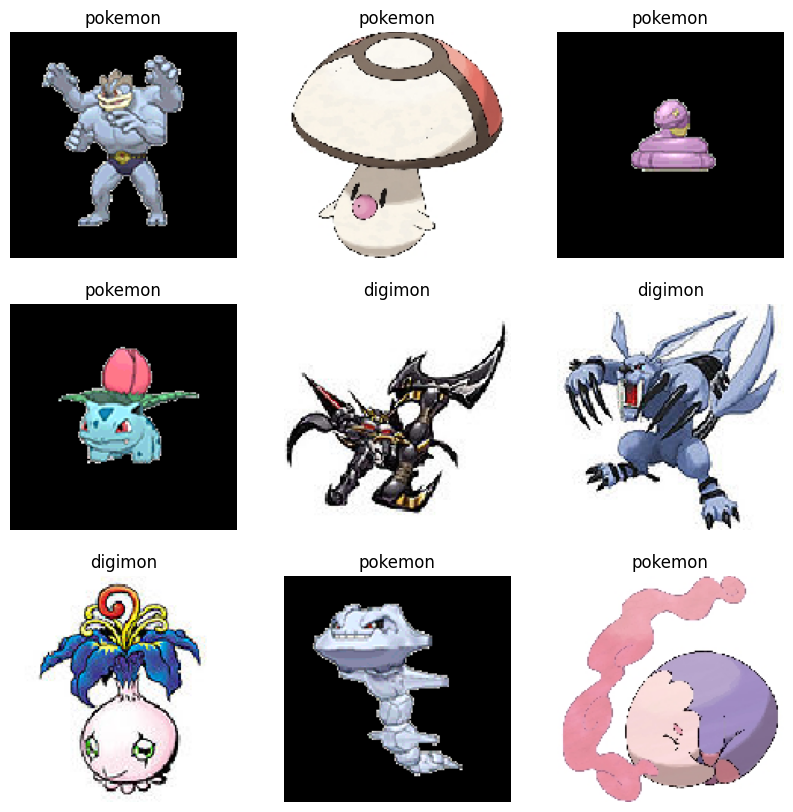

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
    break
plt.show()

MENAMPILKAN 9 GAMBAR

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

BUAT ARSITEKTUR DENGAN METODE CNN

In [11]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy'],
)

COMPILE MODEL

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/10
7/7 [==============================] - 8s 1s/step - loss: 0.2265 - accuracy: 0.8843 - val_loss: 0.5296 - val_accuracy: 0.8208
Epoch 2/10
7/7 [==============================] - 7s 1s/step - loss: 0.1955 - accuracy: 0.9259 - val_loss: 0.3699 - val_accuracy: 0.8679
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 0.1635 - accuracy: 0.9259 - val_loss: 0.4088 - val_accuracy: 0.8443
Epoch 4/10
7/7 [==============================] - 7s 1s/step - loss: 0.1526 - accuracy: 0.9398 - val_loss: 0.3960 - val_accuracy: 0.8491
Epoch 5/10
7/7 [==============================] - 7s 1s/step - loss: 0.1283 - accuracy: 0.9444 - val_loss: 0.5017 - val_accuracy: 0.8585
Epoch 6/10
7/7 [==============================] - 7s 1s/step - loss: 0.1105 - accuracy: 0.9537 - val_loss: 0.5542 - val_accuracy: 0.8632
Epoch 7/10
7/7 [==============================] - 8s 1s/step - loss: 0.0889 - accuracy: 0.9630 - val_loss: 0.8467 - val_accuracy: 0.8208
Epoch 8/10
7/7 [=========================

TRAIN MODEL

In [14]:
model.evaluate(test_generator)

53/53 [==============================] - 20s 377ms/step - loss: 0.6030 - accuracy: 0.8491


[0.6030276417732239, 0.849056601524353]

EVAL MODEL

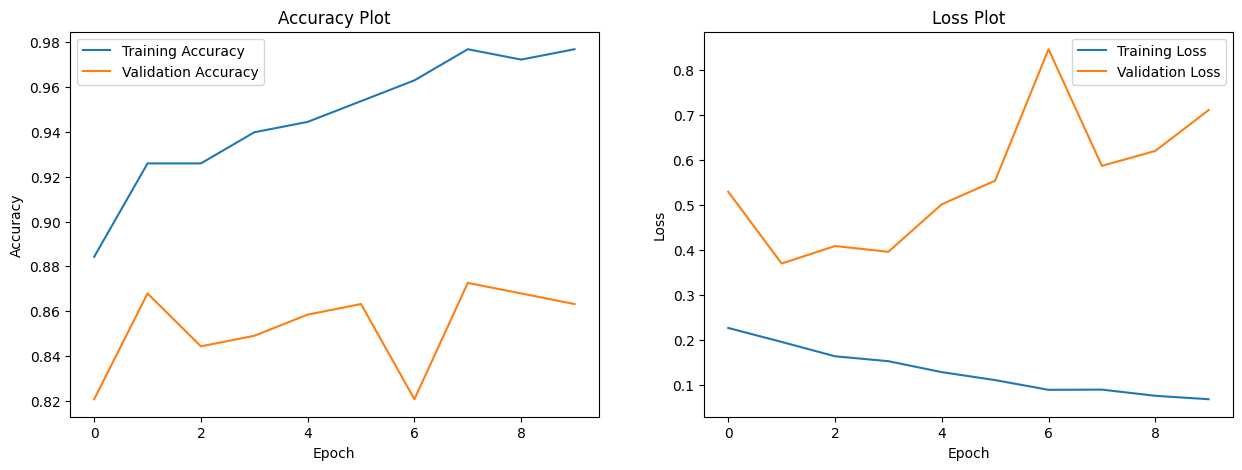

In [15]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
from PIL import Image
import numpy as np
from skimage import transform

IMPORT LIBRARY

In [17]:
def load (filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image)
    np_image = transform.resize(np_image, (150,150,3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load(r'pokemon/digimon/50px-Yggdrasill_core.jpg')
img_pred = model.predict(image)

1/1 [==============================] - 0s 162ms/step


TES MODEL MEMPREDIKSI KELAS GAMBAR YANG DIBERIKAN

In [18]:
pred = np.where(img_pred > 0.5,"digimon","pokemon")
pred

array([['digimon']], dtype='<U7')

MENAMPILKAN HASIL

In [19]:
def load (filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image)
    np_image = transform.resize(np_image, (150,150,3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load(r'pokemon/pokemon/1.jpg')
img_pred = model.predict(image)

1/1 [==============================] - 0s 50ms/step


TES MODEL MEMPREDIKSI KELAS GAMBAR YANG DIBERIKAN

In [20]:
pred = np.where(img_pred > 0.5,"digimon","pokemon")
pred

array([['digimon']], dtype='<U7')

BUAT ARSITEKTUR DENGAN METODE CNN